<a href="https://colab.research.google.com/github/helarebah/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
filename = "/content/sales_predictions_2023.csv"

In [190]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?



In [191]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?



In [192]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.



In [193]:
df.duplicated().sum()
# there is no duplicated rows

0

4) Identify missing values.



In [194]:
df.isna().sum()
# there is 1463 missing values in the column "Item_Weight" and 2410 missing values in the column "Outlet_Size"

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [195]:
# we will start by the missing values in the colomn "Outlet_Size"
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [196]:
# we want now to extract the data of the colomn "Outlet_Establishment_Year" where the values in the colomn "Outlet_Size" are not missing
df[df['Outlet_Size'].notna()].groupby('Outlet_Size')['Outlet_Establishment_Year'].unique()

Outlet_Size
High                  [1987]
Medium    [1999, 2009, 1985]
Small     [1997, 2004, 1985]
Name: Outlet_Establishment_Year, dtype: object

In [197]:
# now, we want to extract the values of the colomn "Outlet_Establishment_Year" where the values in the colomn "Outlet_Size" are missing
missing_data_by_year = df[df['Outlet_Size'].isna()].groupby('Outlet_Establishment_Year').size()
missing_data_by_year
# We can notice here that the missing values in the colomn "Outlet_Size" are only related with the years 1998, 2002 and 2007

Outlet_Establishment_Year
1998    555
2002    929
2007    926
dtype: int64

In [198]:
# that's why i decided to drop the rows where there is a missing value in the column "Outlet_Size"
df.dropna(subset=['Outlet_Size'], inplace=True)

In [199]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [200]:
# then, we will drop the colomn "Item_Weight" because it's considered as irrelevant data because it doesn't affect the sales
df.drop("Item_Weight", axis=1, inplace=True)

In [201]:
# now, we will clean the data by dropping colomns that does not affect the sales : "Item_Identifier", "Outlet_Identifier"and "Outlet_Establishment_Year"
df.drop(columns = ["Item_Identifier", "Outlet_Identifier", "Outlet_Establishment_Year"], inplace = True )

6) Confirm that there are no missing values after addressing them.



In [202]:
df.isna().sum()

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

 Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [203]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Hard Drinks', 'Frozen Foods', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [204]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [205]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [206]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [207]:
df["Item_Fat_Content"].unique()
# as we can see here, there is inconsistent categories like LF and low fat for "Low Fat"

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [208]:
# we are going to fix this inconsistent categorie of data
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Regular")

In [209]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Low Fat")

In [210]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)



In [211]:
df.describe().loc[['min', 'max', 'mean']]

,Item_Visibility,Item_MRP,Item_Outlet_Sales
min,0.000000,31.290000,33.955800
max,0.328391,266.888400,13086.964800
mean,0.064505,141.256859,2322.688445


Histogram to view the distributions of various features in your dataset.


In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
df

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
5,Regular,0.000000,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...
8517,Low Fat,0.083607,Frozen Foods,178.8318,Small,Tier 1,Supermarket Type1,3608.6360
8518,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8520,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


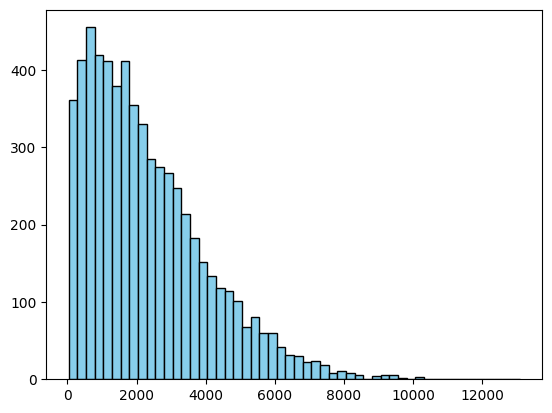

In [214]:
plt.hist(data=df, x='Item_Outlet_Sales', bins = "auto", color ="skyblue", edgecolor = "black");

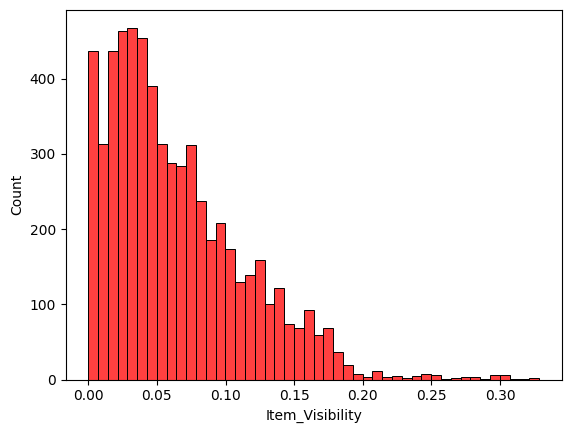

In [215]:
sns.histplot(data=df, x='Item_Visibility', y=None, bins = "auto", color = "red");

Boxplot to view statistical summaries of various features in your dataset.


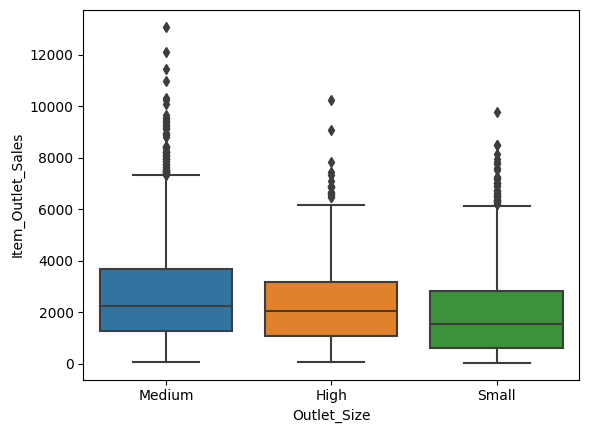

In [216]:
sns.boxplot(data = df, x = "Outlet_Size", y = "Item_Outlet_Sales");

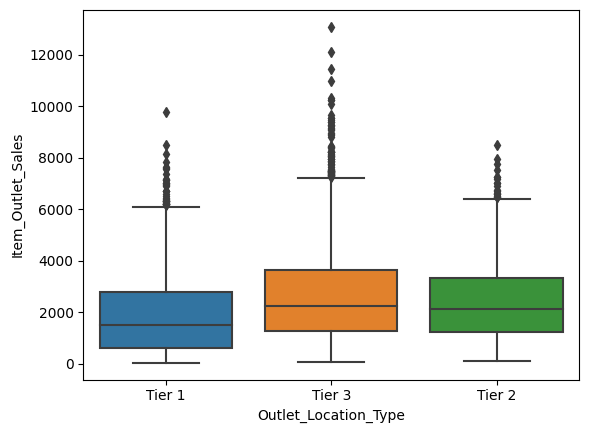

In [217]:
sns.boxplot(data = df, x = "Outlet_Location_Type", y = "Item_Outlet_Sales");

Heatmap of the correlation between features.


In [218]:
corr = df.corr()
corr

<ipython-input-218-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Visibility,1.000000,-0.000651,-0.105854
Item_MRP,-0.000651,1.000000,0.588939
Item_Outlet_Sales,-0.105854,0.588939,1.000000


<Axes: >

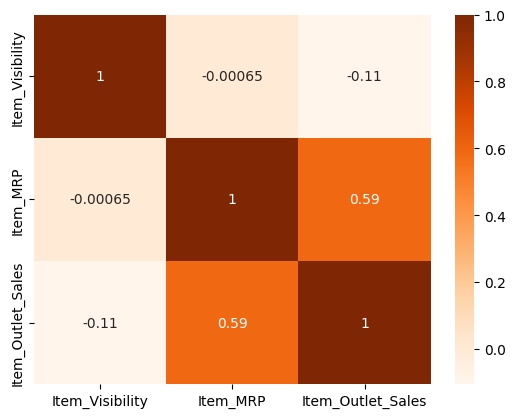

In [219]:
sns.heatmap(corr, cmap = 'Oranges', annot = True)

Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).

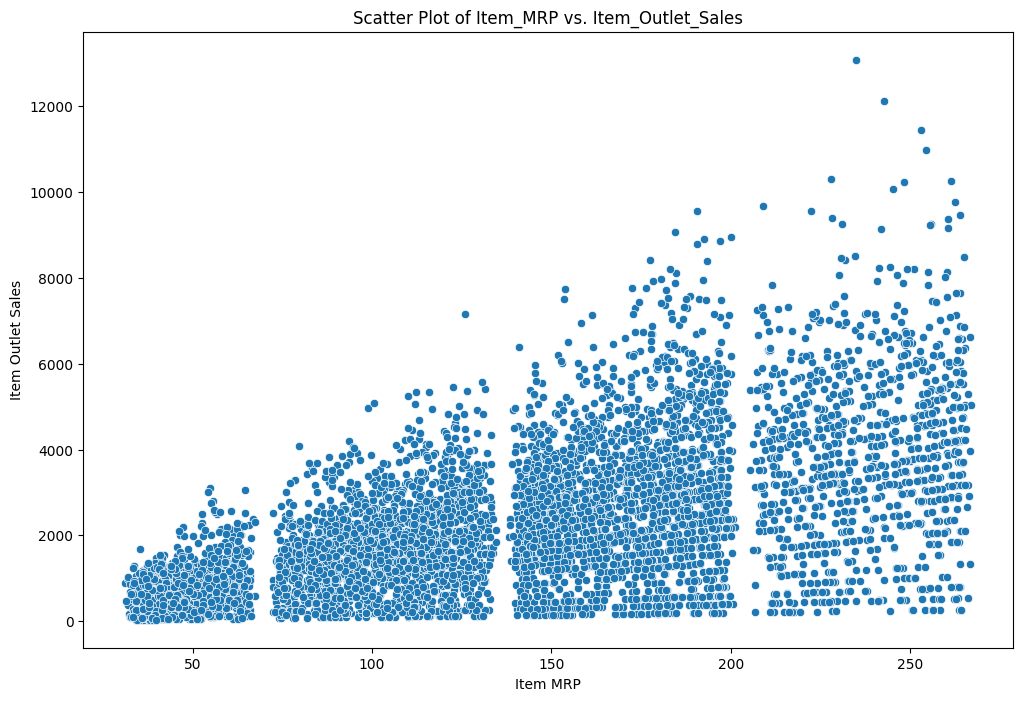

In [220]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales')
plt.title('Scatter Plot of Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

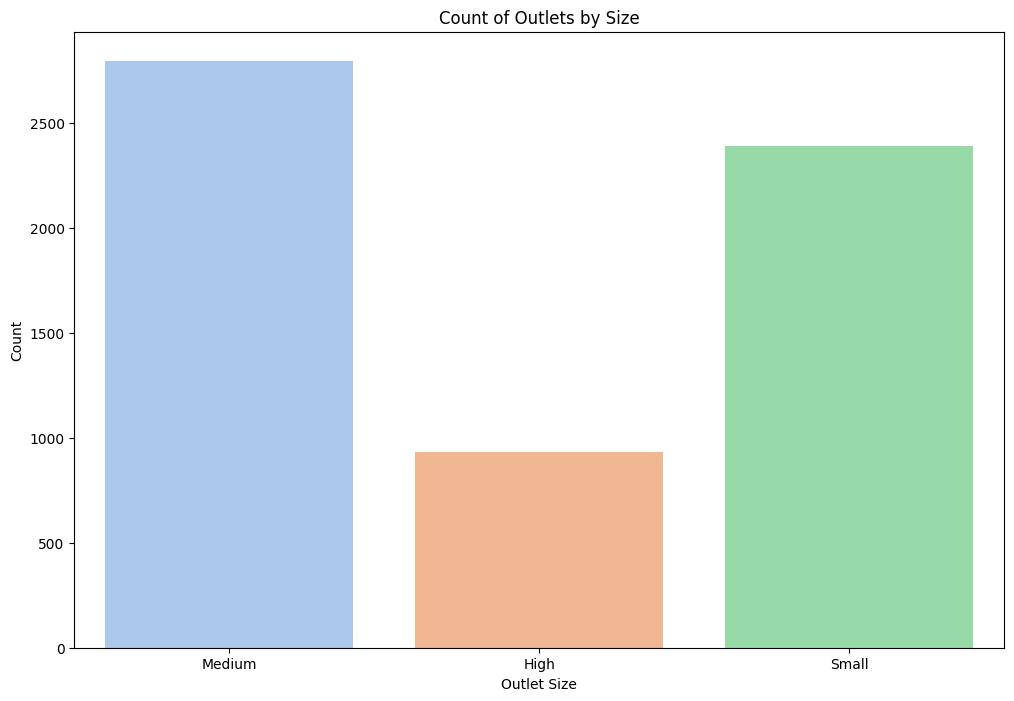

In [221]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Outlet_Size', data=df, palette='pastel')
plt.title('Count of Outlets by Size')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()

In [222]:
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.


In [223]:
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

Perform a train test split


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Create a preprocessing object to prepare the dataset for Machine Learning


In [225]:
# we will start by defining groups of features using lists

In [226]:
numeric_cols = X_train.select_dtypes('number').columns
numeric_cols

Index(['Item_Visibility', 'Item_MRP'], dtype='object')

In [227]:
categorical_cols = X_train.select_dtypes('object').columns
categorical_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [228]:
ordinal_cols = ['Outlet_Size']
ordinal_cols

['Outlet_Size']

In [229]:
# impute the numeric columns

In [230]:
impute_median = SimpleImputer(strategy='median')
impute_median.fit(X_train[numeric_cols])

SimpleImputer(strategy='median')

In [231]:
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

In [232]:
X_train_num_imputed.isna().sum()

Item_Visibility    0
Item_MRP           0
dtype: int64

In [233]:
scaler = StandardScaler()
scaler.fit(X_train_num_imputed)

StandardScaler()

In [234]:
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [235]:
num_pipe.fit(X_train[numeric_cols])

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [236]:
# Impute the categorical columns

In [237]:
impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
impute_missing.fit(X_train[categorical_cols])

SimpleImputer(fill_value='MISSING', strategy='constant')

In [238]:
X_train_cat_imputed = impute_missing.transform(X_train[categorical_cols])
X_test_cat_imputed = impute_missing.transform(X_test[categorical_cols])

In [239]:
X_train_cat_imputed.isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [240]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [241]:
encoder.fit(X_train_cat_imputed)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [242]:
cat_pipe = make_pipeline(impute_missing, encoder)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [243]:
# impute the ordinal columns

In [244]:
impute_most_freq = SimpleImputer(strategy='most_frequent')
impute_most_freq.fit(X_train[ordinal_cols])

SimpleImputer(strategy='most_frequent')

In [245]:
X_train_ord_imputed = impute_most_freq.transform(X_train[ordinal_cols])
X_test_ord_imputed = impute_most_freq.transform(X_test[ordinal_cols])

In [246]:
X_train_ord_imputed.isna().sum()

Outlet_Size    0
dtype: int64

In [247]:
X_train_ord_imputed['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [248]:
outlet_size_order = ['Small','Medium', 'High']

In [249]:
ord_encoder = OrdinalEncoder(categories=[outlet_size_order])
ord_encoder.fit(X_train_ord_imputed)

OrdinalEncoder(categories=[['Small', 'Medium', 'High']])

In [250]:
scaler_ord = StandardScaler()

In [252]:
ord_pipe = make_pipeline(impute_most_freq, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                ('standardscaler', StandardScaler())])

In [253]:
num_tuple = ('numeric', num_pipe, numeric_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Visibility', 'Item_MRP'], dtype='object'))

In [254]:
cat_tuple = ('categorical', cat_pipe, categorical_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [256]:
ord_tuple = ('ordinal', ord_pipe, ordinal_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

In [257]:
col_transformer = ColumnTransformer([num_tuple, cat_tuple], verbose_feature_names_out=False)

In [258]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [259]:
X_train_processed = col_transformer.transform(X_train)

In [260]:
X_test_processed = col_transformer.transform(X_test)

In [261]:
X_train_processed.head()

,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1190,-0.213149,0.593352,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2279,-0.873214,-0.270301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3526,-0.163579,-1.424693,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4023,1.122206,0.356851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5687,-0.970125,0.322274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [262]:
X_train_processed.dtypes

Item_Visibility                    float64
Item_MRP                           float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_Starchy Foods            float64
Outlet_Size_High                   float64
Outlet_Size_Medium                 float64
Outlet_Size_Small                  float64
Outlet_Loca

In [263]:
X_train_processed.describe()

,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,4.584000e+03,4.584000e+03,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000,4584.000000
mean,-1.162537e-17,1.402795e-16,0.646161,0.353839,0.076353,0.030105,0.012435,0.075698,0.084424,0.099258,0.147906,0.022906,0.058901,0.104712,0.049520,0.019852,0.006981,0.142670,0.049738,0.018543,0.150742,0.456588,0.392670,0.393106,0.152705,0.454188,0.085515,0.611038,0.153578,0.149869
std,1.000109e+00,1.000109e+00,0.478212,0.478212,0.265590,0.170894,0.110827,0.264543,0.278053,0.299041,0.355045,0.149619,0.235464,0.306215,0.216975,0.139506,0.083268,0.349774,0.217427,0.134918,0.357836,0.498166,0.488398,0.488493,0.359742,0.497951,0.279677,0.487568,0.360583,0.356982
min,-1.287872e+00,-1.744130e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.590486e-01,-7.583108e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.328664e-01,3.373770e-02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5.583743e-01,7.158452e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,5.233532e+00,2.007688e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
